# Used Cars Price Prediction Model

---

This notebook demonstrates a simple model for predicting the price of a used car which will then be deployed using Flask and Streamlit.

In [1]:
# import basic modules for data
import pandas as pd
import numpy as np
import seaborn as sb

# import modelling modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import pickle to save and load files
import pickle

### Import data

First we import the data into a dataframe, then adjust the selling price to be in dollars (we assume it is in cents in the original data).

In [2]:
df = pd.read_csv('data/UsedCars2.csv')
df['selling_price'] = df['selling_price']/100
df

,selling_price,year,km_driven,owners,kmpl,engine_cc,power_bhp,seats
0,1300.0,2007,120000,1,16.10,1298,88.20,5
1,7780.0,2016,70000,2,24.52,1248,88.50,7
2,5000.0,2012,53000,2,23.00,1396,90.00,5
3,6000.0,2012,72000,1,21.50,1248,88.80,5
4,11490.0,2019,5000,1,17.00,1591,121.30,5
...,...,...,...,...,...,...,...,...
1590,4250.0,2017,12000,1,23.10,998,67.04,5
1591,4250.0,2014,50000,1,23.59,1364,67.06,5
1592,4250.0,2010,129000,1,12.80,2494,102.00,8
1593,400.0,1997,120000,1,16.10,796,37.00,4


### Model
We'll build a simple linear regression model but first let's separate the features (`X`) and target (`y`) as well as split into train and test data.

In [3]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

We can now train the model, make predictions on each split, and look at the resulting model performance.

In [4]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print(f"Train R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")

Train R-squared: 0.6710561735217893
Test R-squared: 0.6392818572452403


<Axes: xlabel='selling_price'>

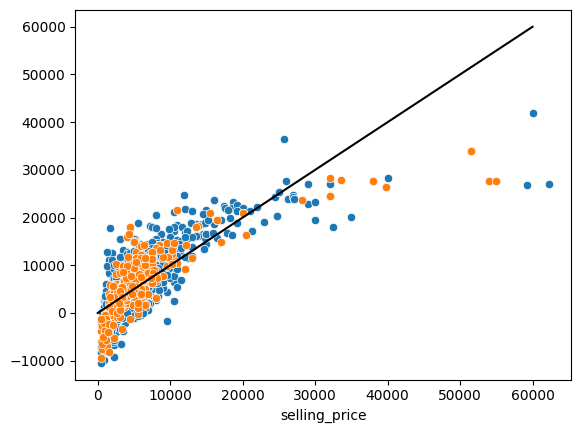

In [5]:
sb.lineplot(x=[0, 60000],y=[0, 60000],c='k')
sb.scatterplot(x=y_train,y=y_pred_train)
sb.scatterplot(x=y_test,y=y_pred_test)

### Saving

We'll save our model in a pickle file for later use.

In [6]:
with open('models/model.pkl','wb') as f:
    pickle.dump(model,f)